# **CASE STUDY REVOU DAMC - 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the dataset
sheet_url='https://docs.google.com/spreadsheets/d/1So-bL_DjZVX6dYeHkfXnb4k_IOsKvvkHm5NvAryu0Vs/edit#gid=1485085913'
sheet_url_trf=sheet_url.replace('/edit#gid=','/export?format=csv&gid=')
print(sheet_url_trf)
df=pd.read_csv(sheet_url_trf)

#changing release variable to datetime
df_cleaned=df.copy()
df_cleaned['Release']=pd.to_datetime(df_cleaned['Release'])

#dropping duplication
df_cleaned=df_cleaned.drop_duplicates()

#checking the data
print(df_cleaned.info())

#display the data
df_cleaned.head()

https://docs.google.com/spreadsheets/d/1So-bL_DjZVX6dYeHkfXnb4k_IOsKvvkHm5NvAryu0Vs/export?format=csv&gid=1485085913
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB
None


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


#Which Game is The Oldest and Newest in the Dataset

In [ ]:
df_cleaned[['Name','Release']].sort_values('Release').head()

,Name,Release
133,Hydlide,1984-12-01
34,Where in the World Is Carmen Sandiego?,1985-06-01
88,International Karate,1985-11-01
162,Tetris,1988-01-01
22,Last Ninja 2,1988-08-01


The oldest game by release dat is Hydlide which was release in December 1984

In [ ]:
df_cleaned[['Name','Release']].sort_values('Release',ascending=False).head()

,Name,Release
20,Valheim,2021-02-01
27,Cyberpunk 2077,2020-12-01
110,Crusader Kings III,2020-09-01
10,Fall Guys,2020-08-01
139,Mordhau,2019-04-01


The newest game by release is Valheim which was released by February 2021

# Which Publisher Published Most of the Games?

In [ ]:
agg_publisher=df_cleaned.groupby('Publisher', as_index=False)['Name'].nunique()
agg_publisher.sort_values('Name',ascending=False)

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


Electronic Arts published most of the games compared the other publisher (19 game)

<Axes: xlabel='Publisher', ylabel='Name'>

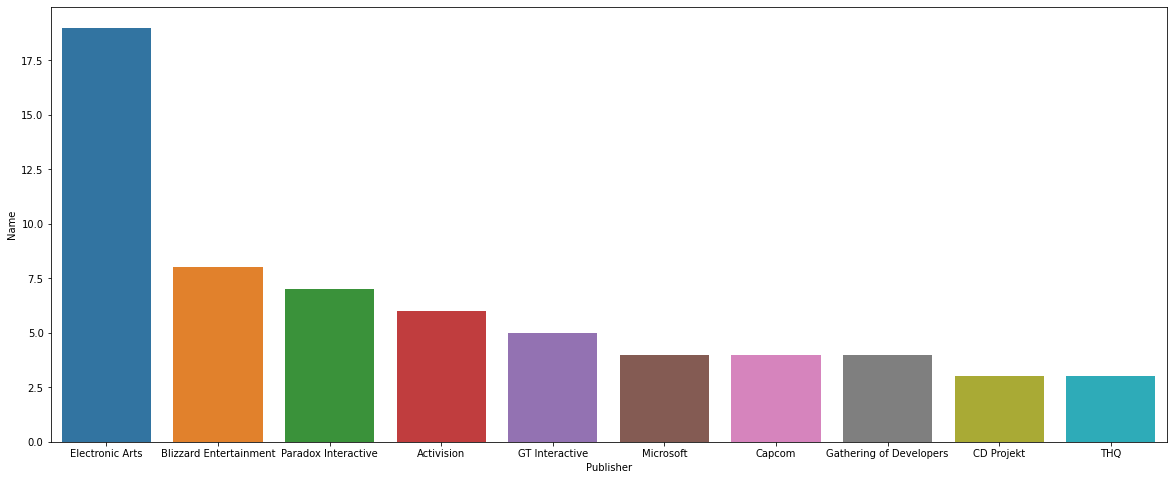

In [ ]:
plt.rcParams['figure.figsize']=(20,8)
agg_publisher_sorted=agg_publisher.sort_values('Name',ascending=False).head(10)
sns.barplot(data=agg_publisher_sorted, x='Publisher', y='Name')

#Which Developer Developed Most of the Games?

In [ ]:
agg_developer=df_cleaned.groupby('Developer', as_index=False)['Name'].nunique()
agg_developer.sort_values('Name',ascending=False)

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


Blizzard Entertainment developed most of the games compared the other developers (8 game)

<Axes: xlabel='Developer', ylabel='Name'>

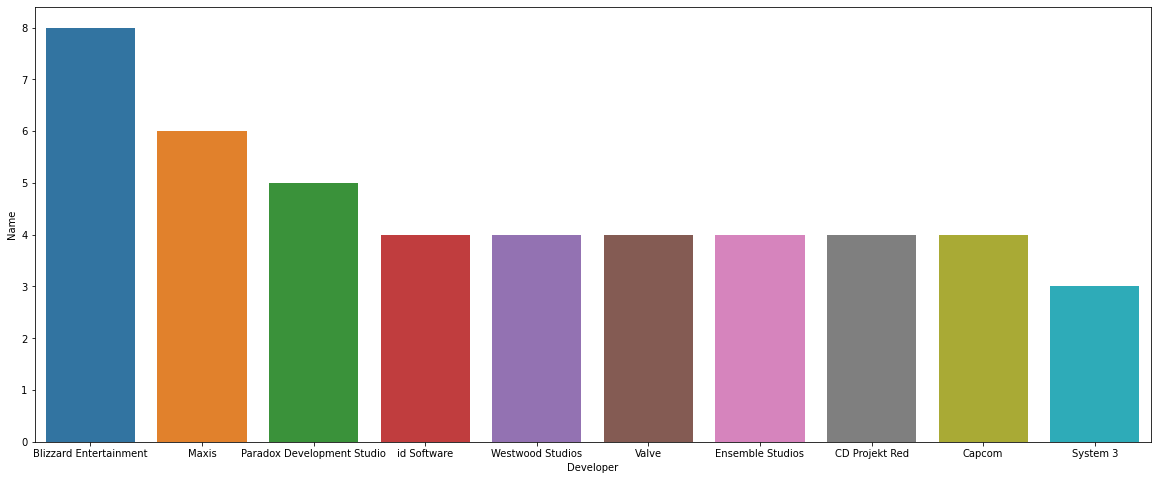

In [ ]:
plt.rcParams['figure.figsize']=(20,8)
agg_developer_sorted=agg_developer.sort_values('Name',ascending=False).head(10)
sns.barplot(data=agg_developer_sorted, x='Developer', y='Name')

#Which Series Is The Most Sales

In [ ]:
agg_series=df_cleaned.groupby('Series', as_index=False).agg({'Sales':'sum','Name':'nunique'})
agg_series.sort_values('Sales',ascending=False)

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3
...,...,...,...
60,RoboCop,1.0,1
46,Microsoft Flight Simulator,1.0,1
58,Railroad Tycoon,1.0,1
56,Psychonauts,1.0,1


Minecraft series has the most sales with 33 sales

<Axes: xlabel='Series', ylabel='Sales'>

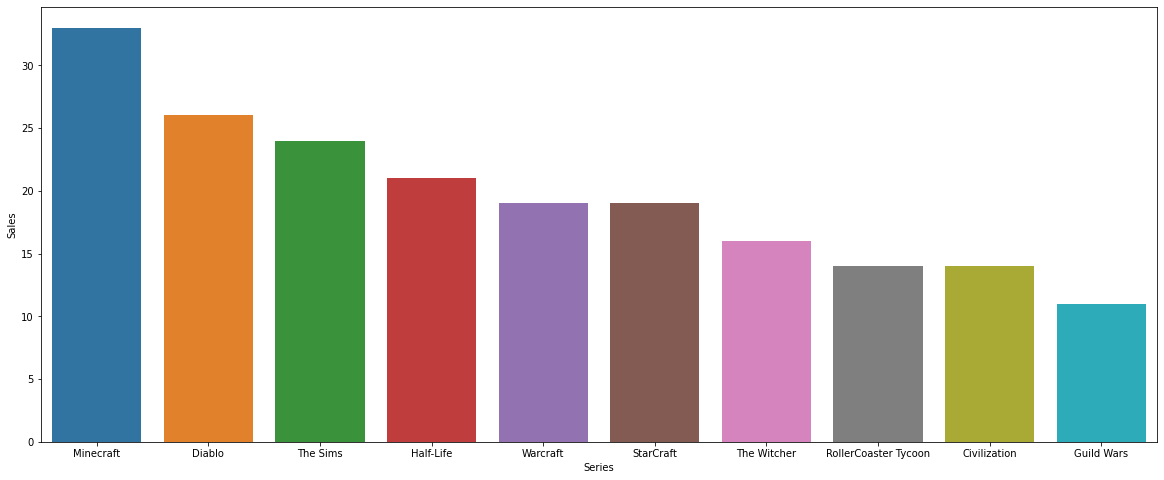

In [ ]:
plt.rcParams['figure.figsize']=(20,8)
agg_series_sales_sorted=agg_series.sort_values('Sales',ascending=False).head(10)
sns.barplot(data=agg_series_sales_sorted, x='Series', y='Sales')

#Which Series Have the Most Games

In [ ]:
agg_series.sort_values('Name', ascending=False)

,Series,Sales,Name
13,Command & Conquer,9.0,5
68,StarCraft,19.0,4
2,Age of Empires,8.0,4
12,Civilization,14.0,4
20,Dark Souls,9.6,3
...,...,...,...
41,International Karate,1.5,1
40,Hydlide,1.0,1
38,Hearts of Iron,1.0,1
37,Harry Potter,1.0,1


Command & Conquer seriues has the most games with 5 games

<Axes: xlabel='Series', ylabel='Name'>

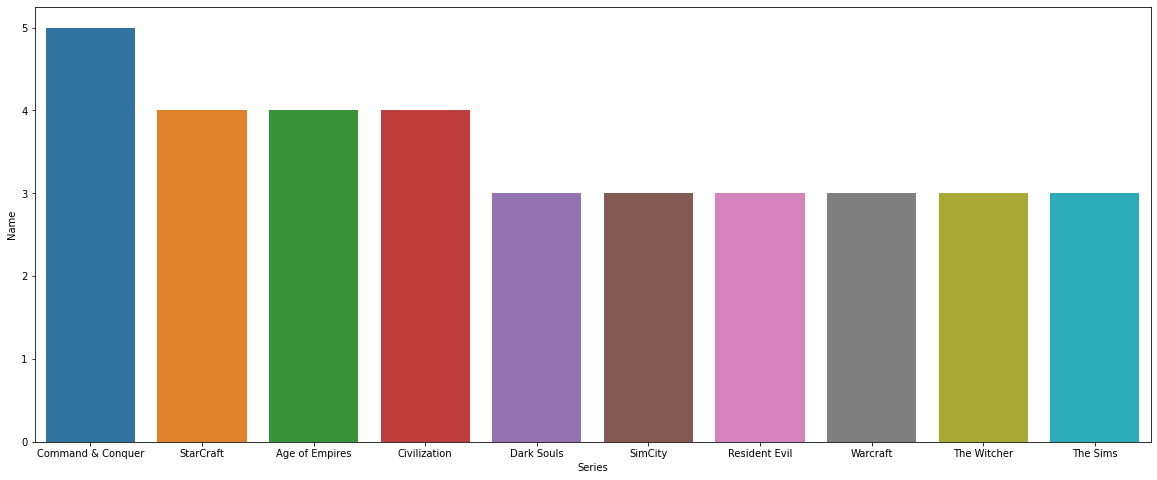

In [ ]:
plt.rcParams['figure.figsize']=(20,8)
agg_series_name_sorted=agg_series.sort_values('Name',ascending=False).head(10)
sns.barplot(data=agg_series_name_sorted, x='Series', y='Name')